In [1]:
%matplotlib inline 
from sets import Set
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

/Users/nicochaves/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/nicochaves/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: the sets module is deprecated
  from ipykernel import kernelapp as app


## Read in the Data

In [2]:
vcf_data = pd.read_csv('data/preprocessed/vcf_features_with_VQSR_labels.txt', sep='\t')

feature_names = list({'AC',
 'AF',
 'AN',
 'BaseQRankSum',
 'ClippingRankSum',
 'DP',
 'FS',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQ0',
 'MQRankSum',
 'QD',
 'ReadPosRankSum',
 'SOR',
 'VQSLOD'})

features = vcf_data[feature_names]
passed_vqsr = vcf_data['PASSED_VQSR']

## Data Visualization Using T-SNE

In [3]:
def plot_embedding(embedding):
    """
    Plot a 2-dimensional embedding of a dataset
    :param embedding: The embedding
    :return: None
    """

    fig, ax = plt.subplots(figsize = (10,10))
    #for i,group in df.groupby(colorby):
    #    group.plot(x='DIM1',y='DIM2',kind='scatter',label=i,color=colors[color],title=plot_title,ax=ax)
    #    color = color + 1
    plt.plot(embedding[:,0], embedding[:,1], 'bo')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

### T-SNE Embedding without Any Labeling

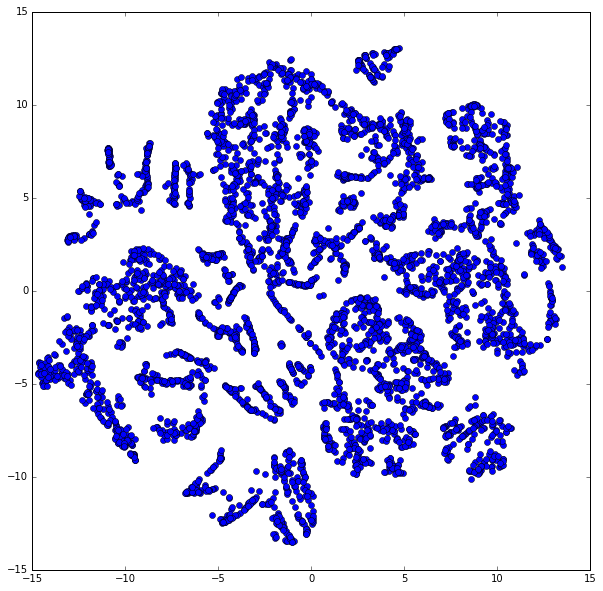

In [10]:
num_features_to_embed = 5000 #features.shape[0]
model = TSNE(n_components=2, random_state=0)
embedding = model.fit_transform(features[:num_features_to_embed])
plot_embedding(embedding)

#### It's not immediately clear if there is much structure in the VCF file annotation space

### T-SNE Embedding using VQSR Filter Output for Labels

In [11]:
vqsr_pos_indices = passed_vqsr[passed_vqsr == 1].index
vqsr_pos_indices = [i for i in vqsr_pos_indices if i < num_features_to_embed]
vqsr_neg_indices = passed_vqsr[passed_vqsr == 0].index;
vqsr_neg_indices = [i for i in vqsr_neg_indices if i < num_features_to_embed]

vqsr_pos_embedding = embedding[vqsr_pos_indices];
vqsr_neg_embedding = embedding[vqsr_neg_indices];

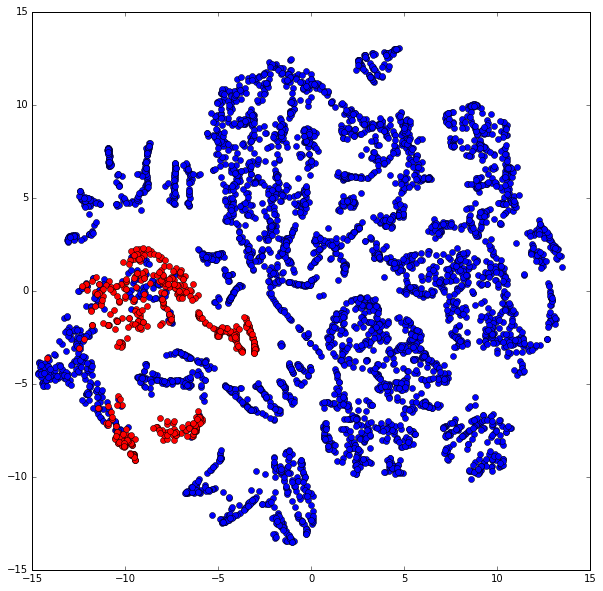

In [12]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(vqsr_pos_embedding[:,0], vqsr_pos_embedding[:,1], 'bo')
plt.plot(vqsr_neg_embedding[:,0], vqsr_neg_embedding[:,1], 'ro')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### It's still not clear if VQSR is finding some structure in the VCF file's annotations. 

## Do the same as above but use Ground Truth for Labels rather than VQSR (Note: you must preprocess ground truth file before doing this)

In [ ]:
true_labels = 0;

In [32]:
features.shape[0]/10

8682